In [1]:
# Import the Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from tensorflow import random

In [2]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# Initialising the CNN
classifier = Sequential()

In [3]:
#  Convolution
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Add additional convolutional layer and pooling
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

In [4]:
# Full ANN Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('.../training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('.../test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [7]:
classifier.fit(training_set, 
               steps_per_epoch = 336, 
               epochs = 2, 
               validation_data = test_set, 
               validation_steps = 83, 
               shuffle=False)

Epoch 1/2
336/336 [==============================] - 132s 390ms/step - loss: 0.5456 - accuracy: 0.7290 - val_loss: 0.4033 - val_accuracy: 0.8193
Epoch 2/2
336/336 [==============================] - 127s 379ms/step - loss: 0.3945 - accuracy: 0.8269 - val_loss: 0.4015 - val_accuracy: 0.8230


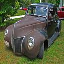

In [9]:
from keras.preprocessing import image
new_image = image.load_img('.../test_image_1.jpg', target_size = (64, 64))
new_image

In [10]:
training_set.class_indices

{'car': 0, 'flower': 1}

In [11]:
new_image = image.img_to_array(new_image)
new_image.shape

(64, 64, 3)

In [12]:
new_image = np.expand_dims(new_image, axis = 0)
new_image.shape

(1, 64, 64, 3)

In [13]:
result = classifier.predict(new_image)
result

array([[0.]], dtype=float32)

In [14]:
if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

It is a car
